# **Ball Tree K-Nearest Neighbor for Spam-Ham Detection**

### **Loading Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

### **Loading the dataset**

In [ ]:
dataset=pd.read_csv("spambase_csv.csv")

print("Columns in the dataset: ")

for col in dataset.columns:
    print(col)

Columns in the dataset: 
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_%3B
char_freq_%28
char_freq_%5B
char_freq_%21
char_freq_%24
char_freq_%23
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


#### **Exploratory Data Analysis**

In [ ]:
print("Columns with missing or NaN values: ")

flag=True
for col in dataset.columns:
    if any(dataset[col].isna()):
        print(col)
        flag=False

if flag:
    print("There are no columns with NaN values")

Columns with missing or NaN values: 
There are no columns with NaN values


#### **H.M.V**

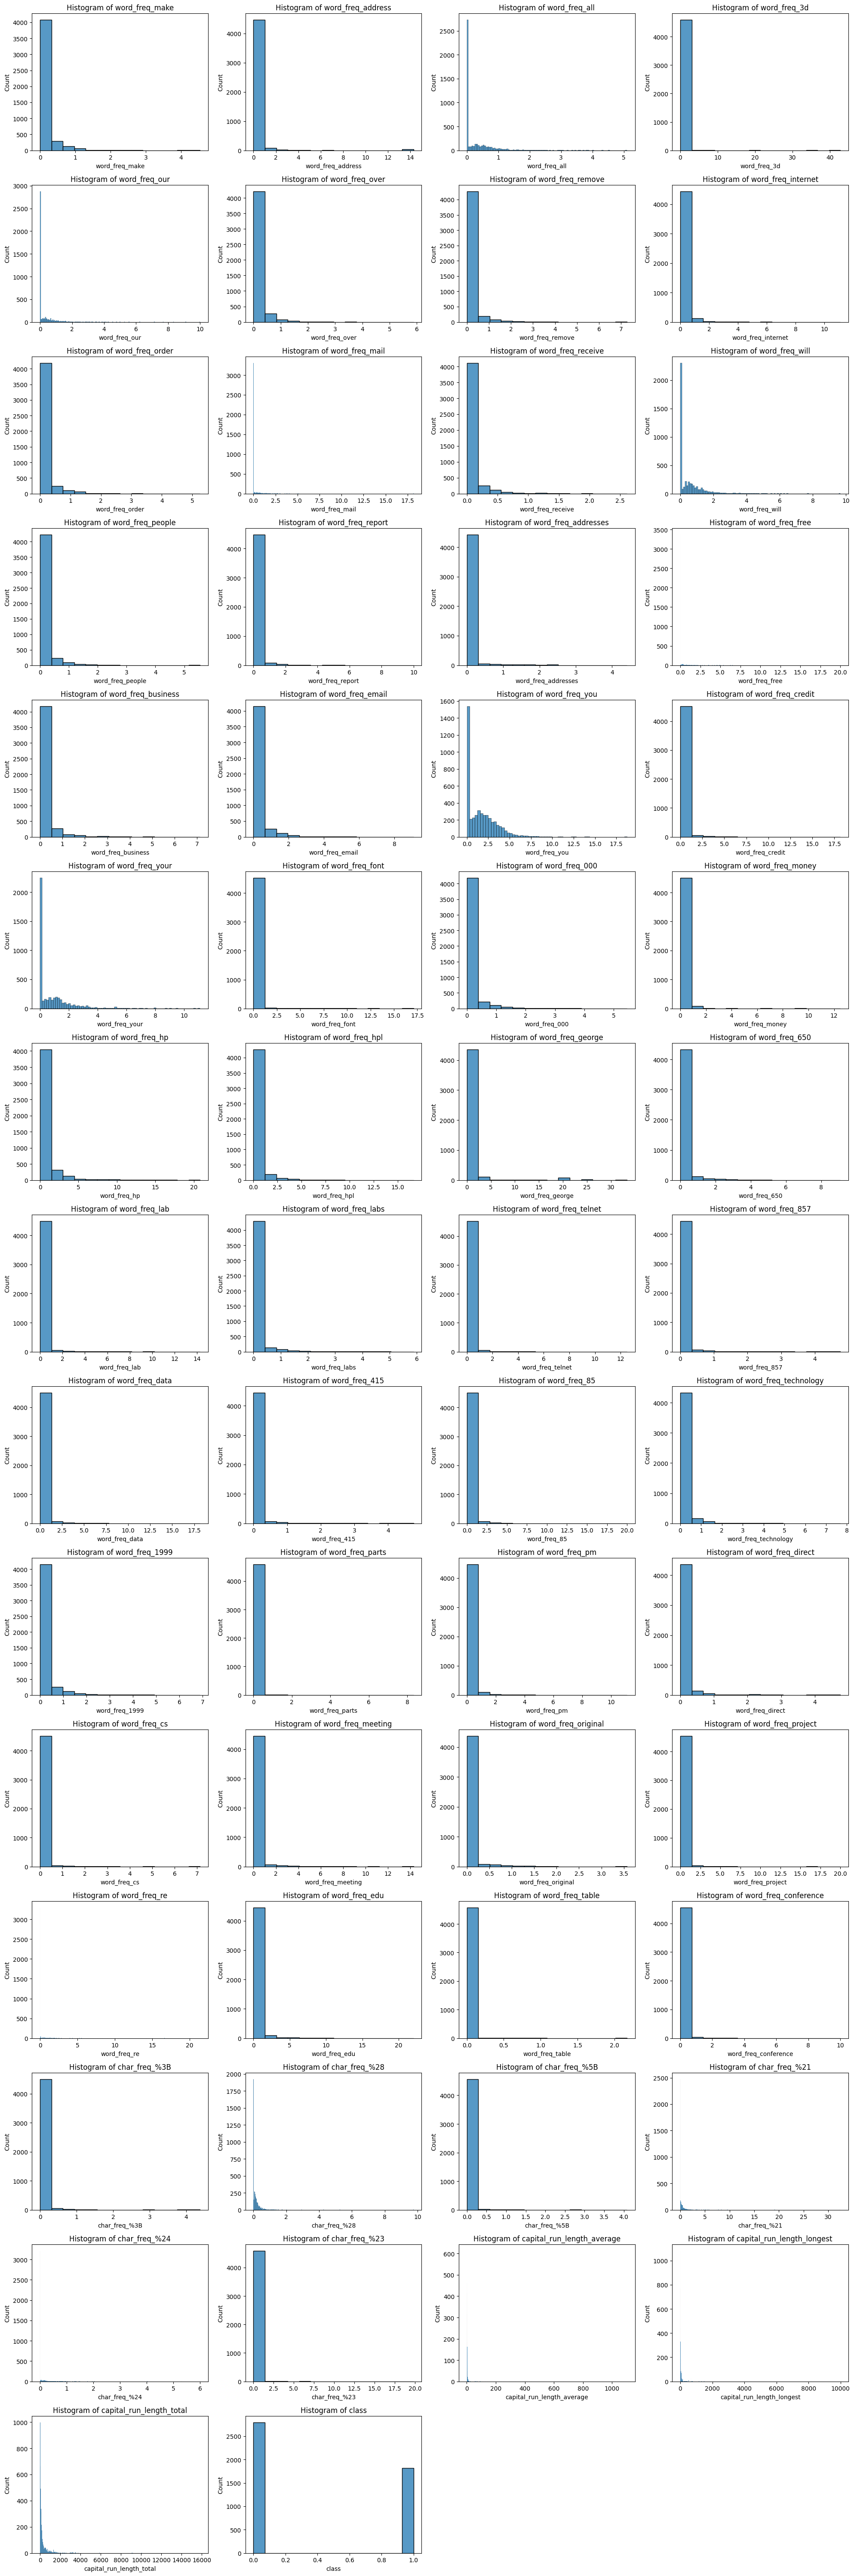

In [ ]:
n = len(dataset.columns)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    sns.histplot(data=dataset, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# Hide any unused subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Encoding**

In [ ]:
#NA

#### **Outlier Analysis**

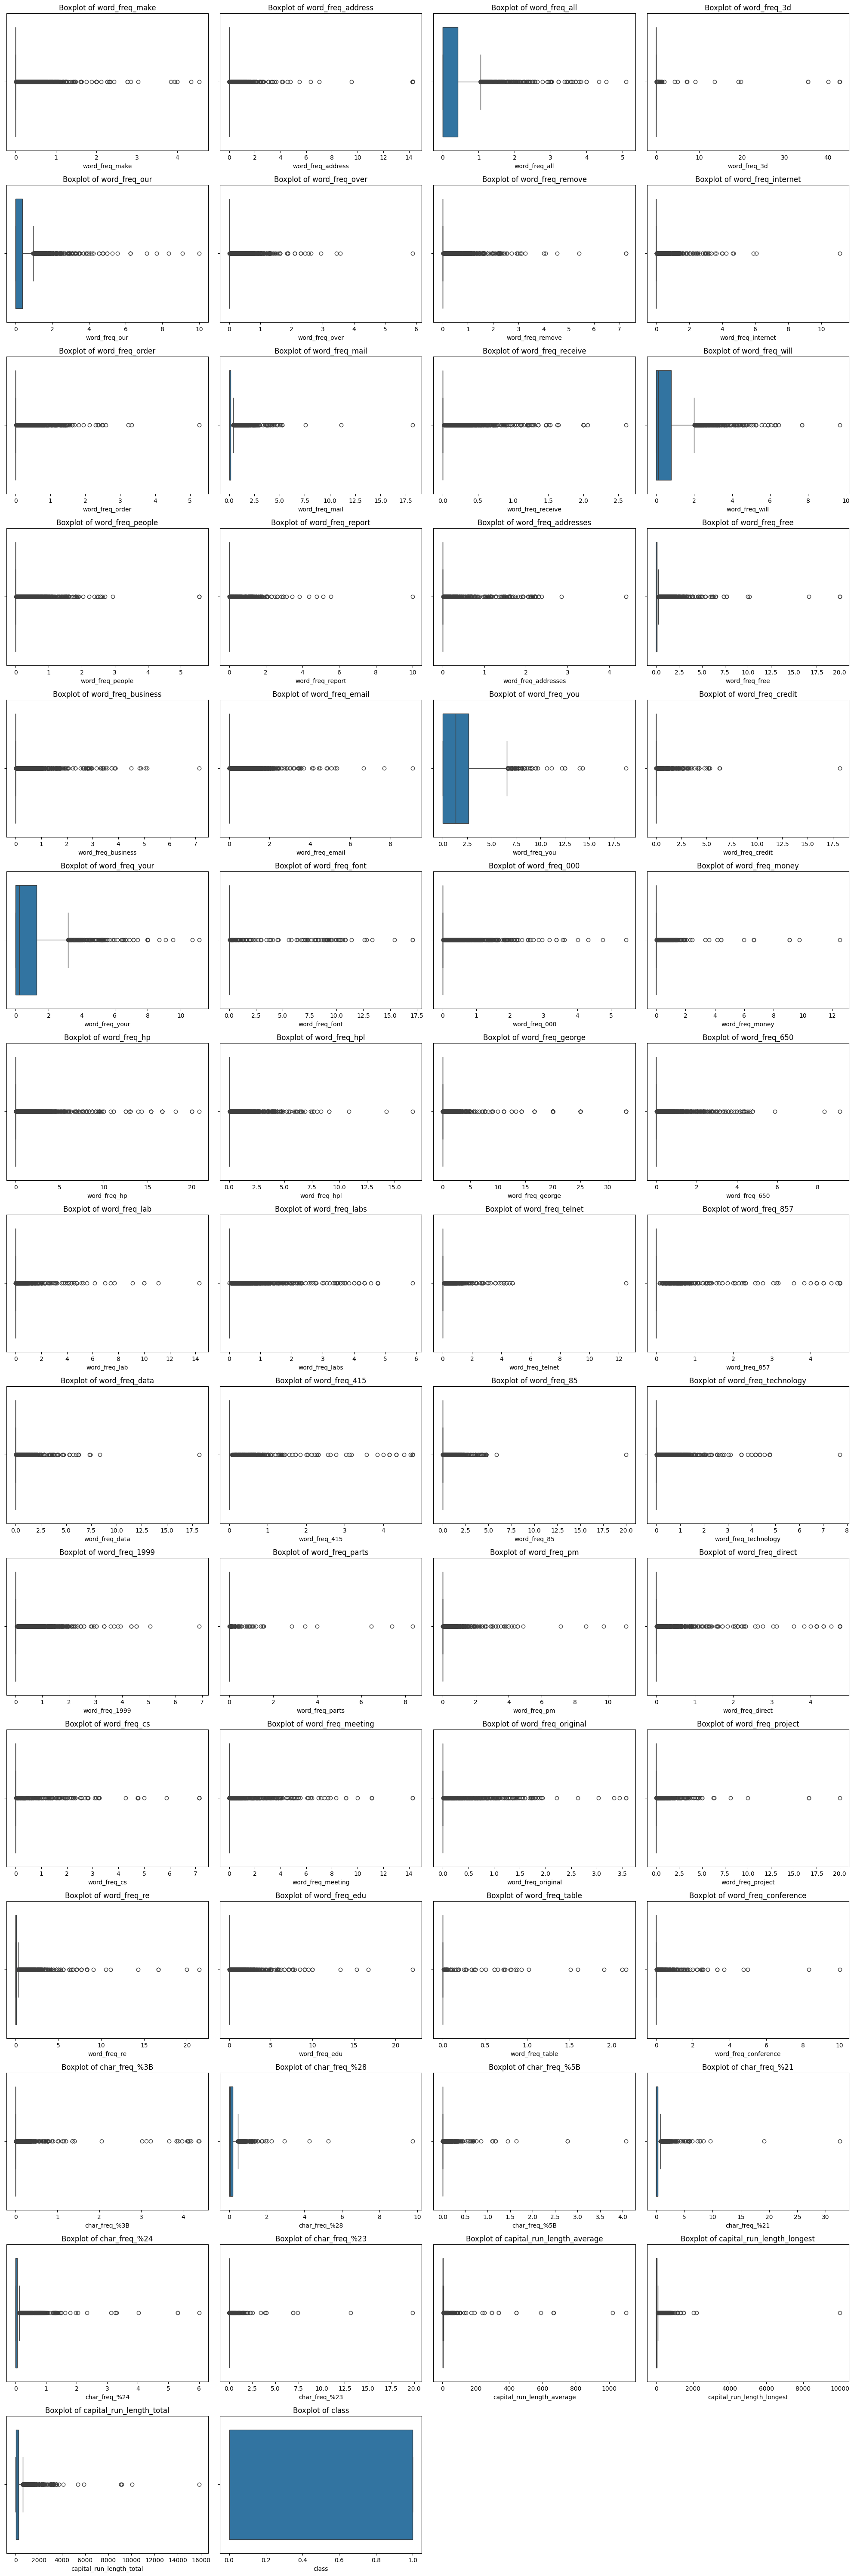

In [ ]:
n = len(dataset.columns)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    sns.boxplot(data=dataset, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Standardization/Normalization**

In [ ]:
#NA

### **Splitting the Dataset**

In [ ]:
X=dataset.drop(columns=['class'])
y=dataset['class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42, stratify=y
)

In [ ]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

### **Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define param grid
param_grid = {'n_neighbors': [1, 3, 5, 7]}

# Use accuracy as refit metric (you can also use 'f1' or any other)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


grid = GridSearchCV(
    KNeighborsClassifier(algorithm='ball_tree'),
    param_grid,
    scoring=scoring,
    refit='f1',  # Final model will be refit using F1
    cv=5,
    return_train_score=False
)

start_time=time.time()

# Fit model
grid.fit(X_train_scaled, y_train)

end_time=time.time()

# Best K
print("Best K (based on F1):", grid.best_params_)

# === Get metrics for each K ===
results = pd.DataFrame(grid.cv_results_)
results = results[[
    'param_n_neighbors',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_test_f1',
    'mean_test_roc_auc'
]]
results.columns = ['K', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
print("\nCross-Validation Metrics for Each K:")
print(results)

# === Evaluate Best Model on Test Set ===
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Test metrics
print("\nTest Set Metrics for Best K:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")


Best K (based on F1): {'n_neighbors': 1}

Cross-Validation Metrics for Each K:
   K  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  1  0.900932   0.881901  0.865239  0.873260  0.894688
1  3  0.899068   0.883558  0.857371  0.870094  0.940843
2  5  0.898447   0.893181  0.843967  0.867638  0.947765
3  7  0.896894   0.890780  0.842383  0.865564  0.953039

Test Set Metrics for Best K:
Accuracy:  0.8950
Precision: 0.8661
Recall:    0.8676
F1 Score:  0.8669
ROC AUC:   0.8902


In [ ]:
print(f"Execution Time: {end_time-start_time}s")

Execution Time: 1.780738115310669s


### **Performance Analysis**

**Training Set**

In [ ]:
from sklearn.metrics import classification_report

y_pred=grid.predict(X_train)

accuracy=accuracy_score(y_pred,y_train)
precision=precision_score(y_pred,y_train)
f1=f1_score(y_pred,y_train)
recall=recall_score(y_pred,y_train)
class_report=classification_report(y_pred,y_train)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("F1 Score: ",f1)
print("Recall: ",recall)
print("\nClassification Report")
print(class_report)

cm=confusion_matrix(y_train,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

y_proba = grid.predict_proba(X_train)[:, 1]

roc_auc = roc_auc_score(y_train, y_proba)

print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_train, y_proba)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on test data')
plt.legend()
plt.grid(True)
plt.show()

**Testing Set**

In [ ]:


y_pred=grid.predict(X_test)

accuracy=accuracy_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
class_report=classification_report(y_pred,y_test)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("F1 Score: ",f1)
print("Recall: ",recall)
print("\nClassification Report")
print(class_report)

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

y_proba = grid.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on test data')
plt.legend()
plt.grid(True)
plt.show()